# Exploratory Data Analisys #

In [1]:
# Python
import datetime
import ipywidgets as widgets # Used with date strat/end widgets
import warnings
warnings.filterwarnings('ignore')
# import os

# thrid part
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = [15, 5]
import numpy as np
import pandas as pd
# pd.set_option('max_columns', 20)
# pd.set_option('max_rows', 60)
# pd.set_option('max_colwidth', 50)
# pd.set_option('precision', 4)
# pd.set_option('float_format', '{:,.2f}'.format)

# Support helper functions
from support import utils 
from support.orders import Orders

In [2]:
# Load data (best to chose dates which include orders data)
df, df_models, df_service = utils.load_data()

# For anonimous demo
df, df_models, df_service = utils.my_randomizer(df, df_models, df_service)

if df is not None:
    date_start, date_end = utils.show_date()

DatePicker(value=datetime.date(2022, 1, 1), description='Start date')

DatePicker(value=datetime.date(2022, 5, 15), description='End date')

In [3]:
# Plot the orders pivot tables and optionally dumps the reports
try:
    kwargs = {
        'event': {
                'date_start': utils.make_datetime(date_start.value)
            , 'date_end': utils.make_datetime(date_end.value)
            , 'df_filter': None # df['channel'] == 'Ludoma' #(best at order lines level)
            , 'period_orders': 'M'
            , 'drill_down_orders': ['billing_company'] # ['billing_company', 'order_id']
            , 'period_lines': 'Y'
            , 'drill_down_lines': ['lineitem_model','lineitem_sku']
            , 'dump_path': None #'reports'
            , 'log_path': None #'reports'
            , 'jupyter': True
        },
        'context': {
            'df': df
            , 'df_models':  df_models
            , 'df_service': df_service
        }
    }
    utils.plot_pivot_orders(**kwargs)
except Exception as e:
    print(e)

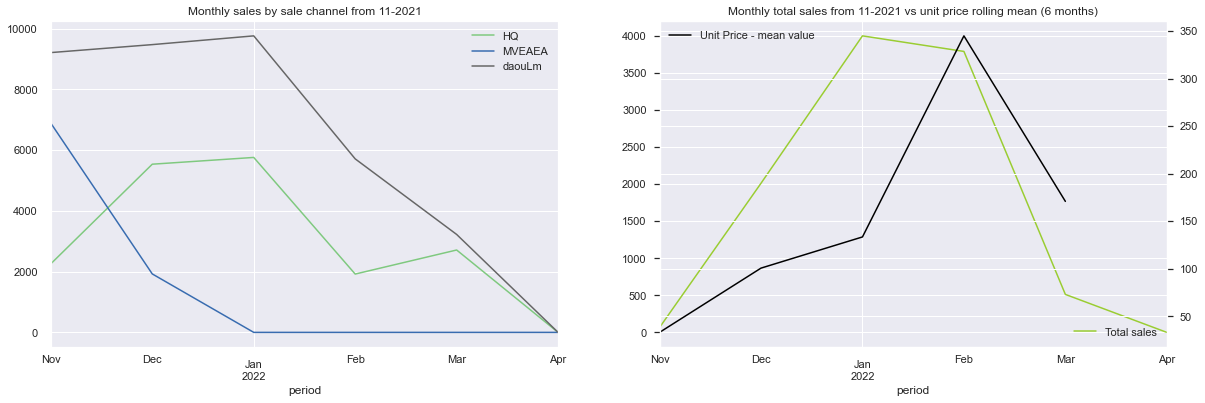

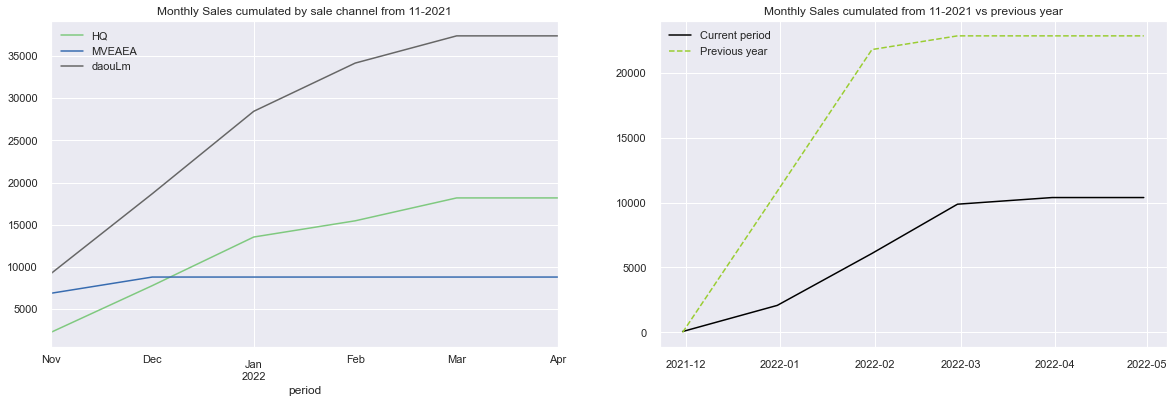

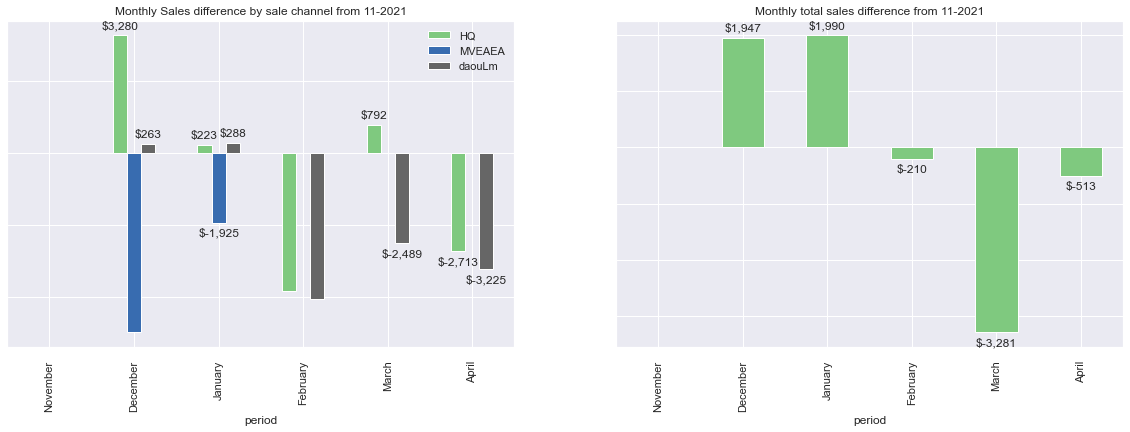

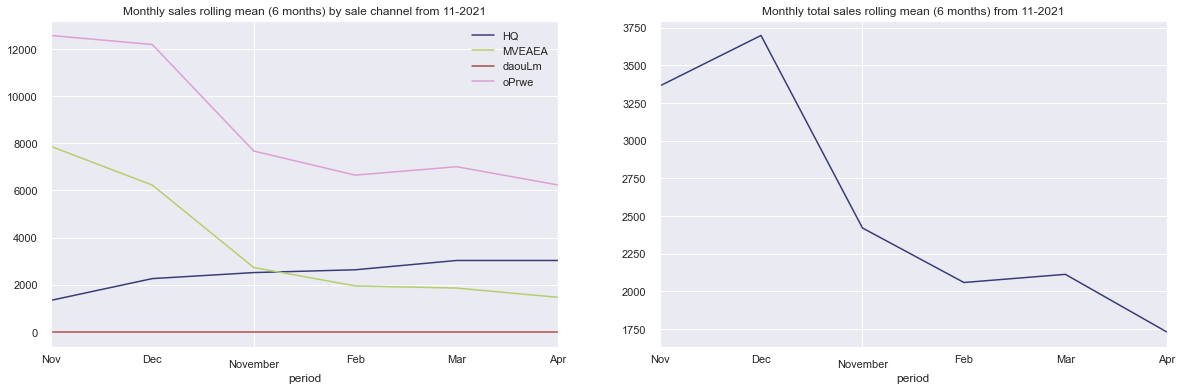

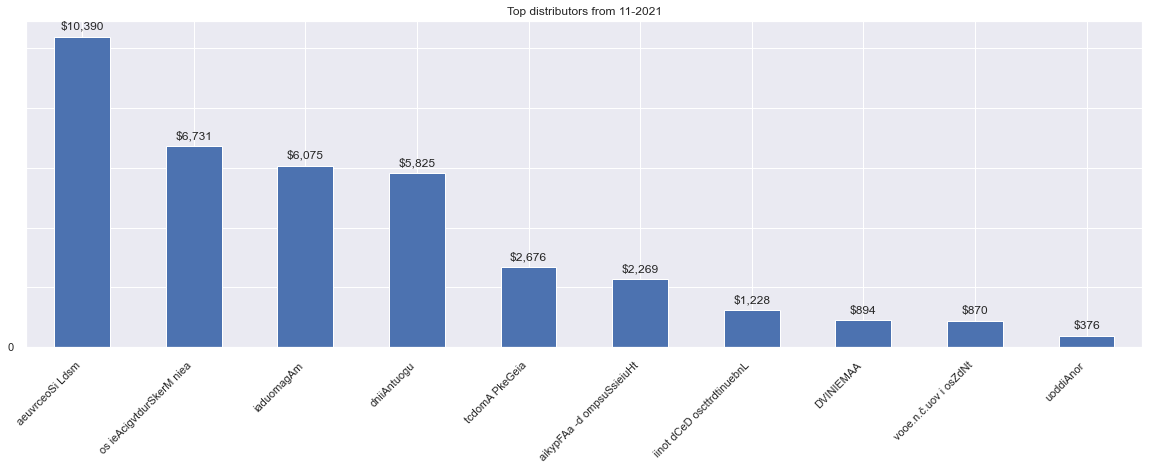

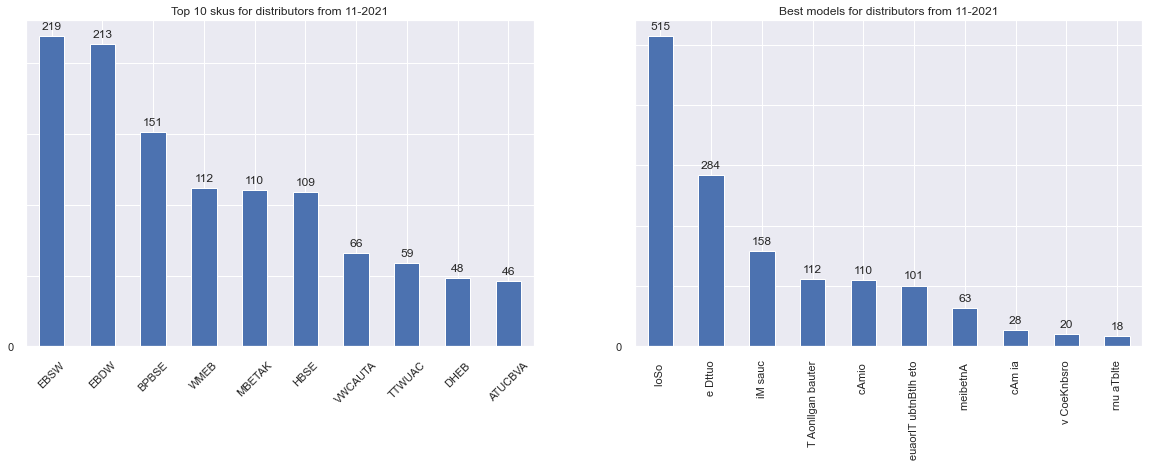

Finished in 2.89 second(s)


In [4]:
# Show the dashboard and optionally dumps the images
try:
    kwargs = {
        'event': {
            'date_start': utils.make_datetime(date_start.value)
            , 'date_end': utils.make_datetime(date_end.value)
            , 'period': 'M'
            , 'window_roll': 6
            , 'figsize': (20,6)
            , 'dump_path_figures': None #'reports'
        },
        'context': {
            'df': df
        }
    }
    utils.plot_dashboard(**kwargs)
except Exception as e:
    print(e)

In [ ]:
# Dumps timeseries, orders_raw, orderlines_raw, for Google Data Studio
try:
    kwargs = {
        'event': {
            'date_start': datetime.datetime(2016,1,1) # utils.make_datetime(date_start.value)
            , 'date_end': utils.make_datetime(date_end.value)
            , 'total_col': ['total_usd']
            , 'period': 'M'
            , 'roll': 12
            , 'dump_path': 'reports'
        },
        'context': {
            'df': df
        },
        'kind': 'timeseries'
    }
    df_c, df_raw = utils.make_pivot(**kwargs)
    display(df_c.head())
except Exception as e:
    print(e)